In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
df = pd.read_csv('../Desktop/temperatures.csv')
df.info()
df.dropna(how='any', inplace=True)
# Any results you write to the current directory are saved as output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
YEAR       115 non-null int64
JAN        115 non-null float64
FEB        115 non-null float64
MAR        115 non-null float64
APR        115 non-null float64
MAY        115 non-null float64
JUN        115 non-null float64
JUL        115 non-null float64
AUG        115 non-null float64
SEP        115 non-null float64
OCT        115 non-null float64
NOV        115 non-null float64
DEC        115 non-null float64
ANNUAL     115 non-null float64
JAN-FEB    115 non-null float64
MAR-MAY    115 non-null float64
JUN-SEP    115 non-null float64
OCT-DEC    115 non-null object
Country    114 non-null object
dtypes: float64(16), int64(1), object(2)
memory usage: 17.1+ KB


In [2]:
subdivs = df['Country'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 1


array(['india'], dtype=object)

Max: 30.3 ocurred in [2009]
Max: 28.11 ocurred in [1917]
Mean: 29.13464912280702


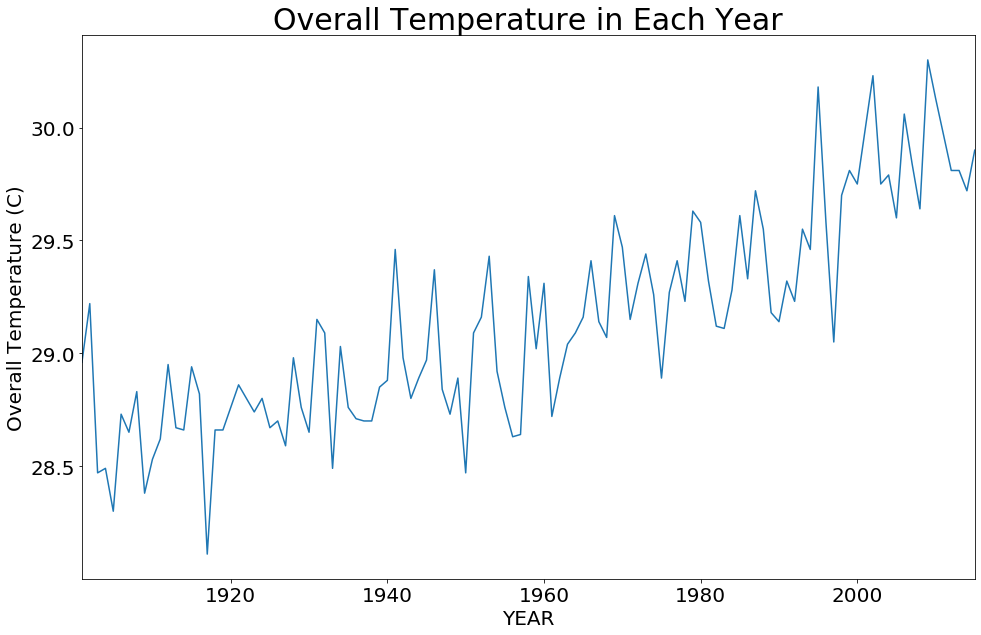

In [4]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['ANNUAL']
dfg.plot('line', title='Overall Temperature in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Temperature (C)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

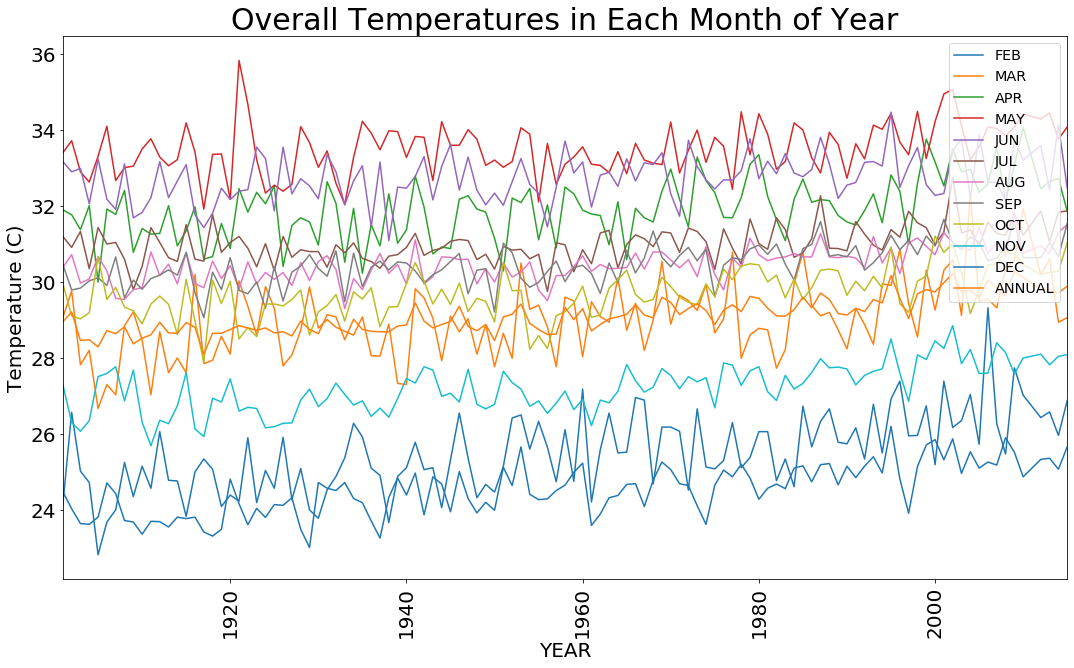

In [10]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Temperatures in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Temperature (C)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)